# LASSO REGRESSION

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [2]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]]) # kategorig değişkenleri onehot encoding metoduyla dummy değişkenlere çevirdik
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.25,
                                                    random_state=42)

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
X[:5]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [4]:
df.shape

(263, 20)

In [5]:
lassoModel = Lasso().fit(X_train, y_train)

C:\Users\ertug\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850412, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [6]:
dir(lassoModel)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'alpha',
 'coef_',
 'copy_X',
 'dual_gap_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'l1_ratio',
 'max_iter',
 'n_features_in_',
 'n_iter_',
 'normalize',
 'path',
 'positive',
 'precompute',
 'predict',
 'random_state',
 'score',
 'selection',
 'set_params',
 'sparse_coef_',
 'tol',
 'warm_start']

In [7]:
lassoModel.intercept_

-5.587450677336392

In [8]:
lassoModel.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

### Farklı lambda değerlerine karşı katsayılar

In [10]:
lasso = Lasso()
coefs = list()
alphas = pow(10, np.linspace(10, -2, 10000))*.5
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

C:\Users\ertug\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4899.41825075075, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\ertug\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5316.685160890222, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\ertug\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5333.72589899227, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\ertug\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

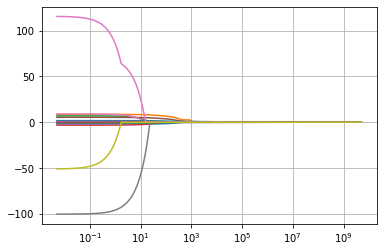

In [11]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.grid()

### Tahmin

In [12]:
lassoModel.predict(X_train)

array([ 377.26270596,  786.51524513,  495.14140718,  117.19492966,
        429.04228506, 1002.11334796,  154.15381011,  359.68989378,
        484.56926344,  915.91820524, 1621.36681998,  818.02000998,
        920.38922996,  740.0753365 ,  648.91895825,  704.11162974,
       1130.60043041,   70.11891848,  189.8294863 ,  405.90479458,
        712.86511905, 1083.4046225 ,  476.32466141,  390.25352238,
         16.97207372,  776.65240332,  563.06001117,  185.22138869,
        340.81729435,  321.25611569,  177.85733207,  527.84105758,
        951.31174027,  296.5785126 ,  459.23878678,  421.02932443,
        426.61663122,  672.47700607,  295.77177958,  207.95609282,
        213.94521388,  318.20806502,  203.26116796,  135.94888004,
        227.95244367, 1089.72631627,  332.92051215,  532.94978567,
        337.73810983,  326.20389761,  509.3004337 ,  445.25608863,
        332.15088365,  451.22456319,  651.74353608,  282.89317095,
        454.89975453,  703.84897012,  273.82207476, 1535.02036

In [13]:
y_pred = lassoModel.predict(X_test)

In [14]:
np.sqrt(mean_squared_error(y_test, y_pred)) 

356.09758845540335

In [15]:
r2_score(y_test, y_pred)

0.4142279813236617

### Model Tuning

In [14]:
alphas = pow(10, np.linspace(10, -2, 100))*.5
lassoCV = LassoCV(alphas=alphas , cv=10, max_iter=100000).fit(X_train, y_train)

In [15]:
lassoCV.alpha_

201.85086292982749

In [16]:
lassoTuned = Lasso().set_params(alpha= lassoCV.alpha_).fit(X_train, y_train)

In [17]:
y_pred = lassoTuned.predict(X_test)

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred)) 

363.6832708037447

In [22]:
pd.Series(lassoTuned.coef_, index=X_train.columns) # Sıfır olarak gözükenler maaşı etkilemeyen değerlerdir

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64